<div style="position: relative; width: 100%; height: 100vh; padding: 50px; box-sizing: border-box;">
    <!-- Logo positioned in the right corner -->
    <img src="logo.png" style="position: absolute; top: 10px; right: 10px; width: 100px;"/>

   <!-- Proprietary Content -->
   <div style="position: absolute; bottom: px5; left: 5%; transform: translateX(-50%); color: grey; text-align: left;font-style: italic">
   <p>Proprietary content. © 10xTechClub. All Rights Reserved. Unauthorized use or distribution prohibited.</p>
   </div>
</div>

<p style="text-align:center; font-size:40px; color:purple;"><b>🎥🍿 Movie Recommendation System 🍿🎥</b></p>



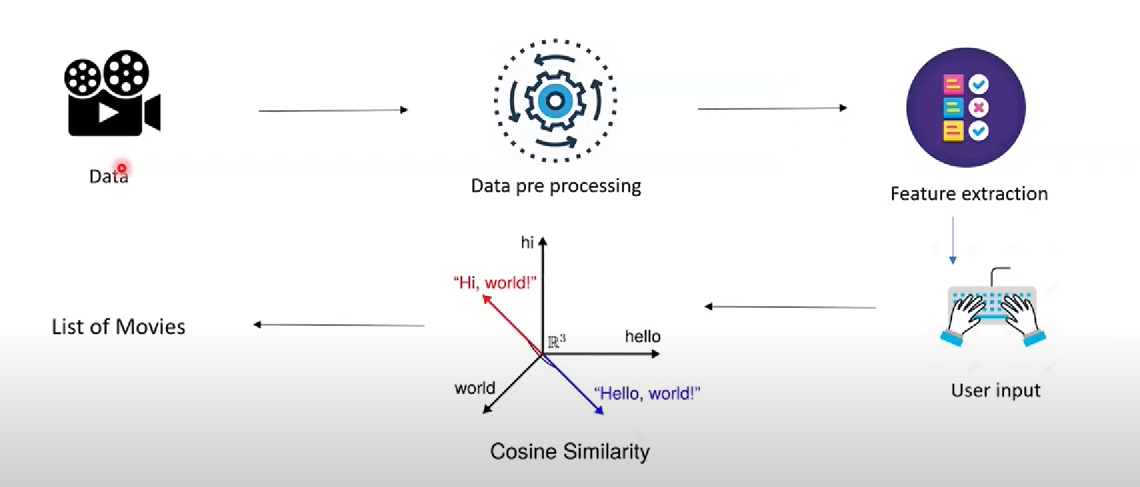

# TF*IDF Algorithm

TF-IDF, which stands for Term Frequency-Inverse Document Frequency, is a numerical statistic used in information retrieval and text mining to evaluate the importance of a word or term within a document relative to a collection of documents (corpus). Here's a short explanation:

1. Term Frequency (TF): This measures how frequently a term (word) appears within a document. It's calculated as the number of times a term appears in a document divided by the total number of terms in that document. The idea is that the more often a term appears in a document, the more important or relevant it might be to that document.

2. Inverse Document Frequency (IDF): This measures the uniqueness or rarity of a term across the entire corpus. It's calculated as the logarithm of the total number of documents in the corpus divided by the number of documents containing the term. The IDF score decreases for terms that appear in many documents and increases for terms that appear in only a few documents. The idea is to give higher weight to terms that are unique and less common across the corpus.

3. TF-IDF Score: The TF-IDF score is the product of TF and IDF. It combines the local importance of a term within a document (TF) with its global importance across the corpus (IDF). The higher the TF-IDF score for a term in a document, the more important and unique that term is to that document.

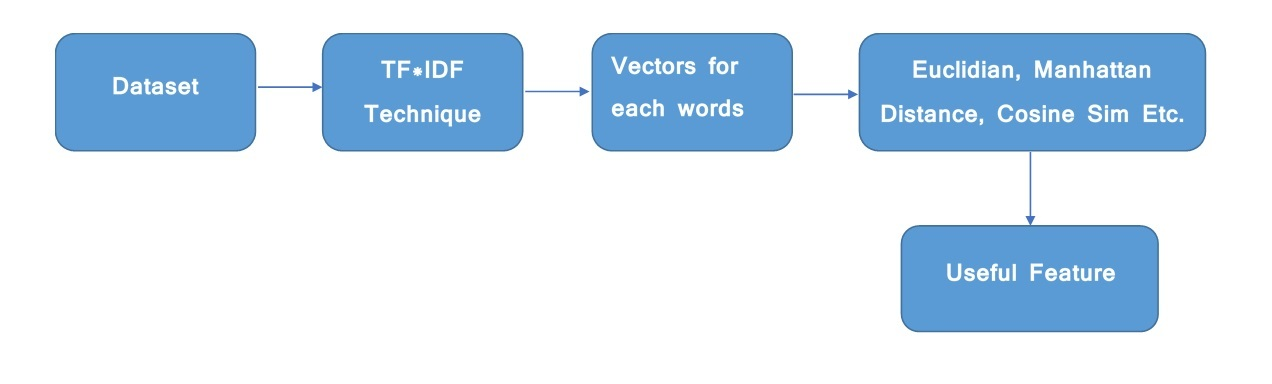

# Cosine Similarity

Cosine similarity is a numerical measure that tells us how similar two vectors are in terms of their direction in a multi-dimensional space. It's often used to compare documents or data points. Here's a short explanation:

Cosine similarity calculates the cosine of the angle between two vectors.
It ranges from -1 (completely opposite) to 1 (exactly the same), with 0 indicating orthogonality (no similarity).
Higher values imply greater similarity between the vectors.
It's commonly used in recommendation systems and text analysis to determine how alike two items or documents are based on their feature vectors.

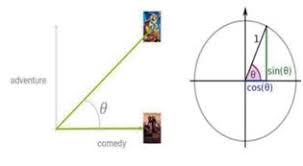

# <span style="color:red;">Importing Libraries</span>  
## 📚 **Explanation:**  
## We're importing `pandas` for handling datasets, `numpy` for numerical operations, `TfidfVectorizer` from `sklearn` for converting text to vectors, and `cosine_similarity` to measure the similarity between movies.


In [5]:
import numpy as np
import pandas as pd
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

<span style="color:red">**Explanation:** This line imports `pandas`, a tool to organize and manage data in tables, just like arranging information in rows and columns in Excel.</span>


# <span style="color:red;">Loading Data</span>  
## We load the movie dataset from a CSV file into a pandas DataFrame to understand the structure of our data.


In [6]:
# loading the data from the csv file to apandas dataframe
movies_data = pd.read_csv('movies1.csv')

C:\Users\MADHAVI\AppData\Local\Temp\ipykernel_9584\4198722897.py:2: DtypeWarning: Columns (0,1,4,9,13,14,19,20,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,2

<span style="color:red">**Explanation:** This loads the movie data from a file into a table called `movies`. It’s like opening a document that has all the movie information we need.</span>


In [7]:
movies_data.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,Unnamed: 1255,Unnamed: 1256,Unnamed: 1257,Unnamed: 1258,Unnamed: 1259,Unnamed: 1260,Unnamed: 1261,Unnamed: 1262,Unnamed: 1263,Unnamed: 1264
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.31295,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
movies_data.shape

(4809, 1265)

# Data Cleaning:

Renaming columns for better understanding and checking the shape of the dataset to understand its size.



In [9]:
movies_data = movies_data.rename(columns={'movie_id':'id', "tittle" : 'title'})

In [10]:
movies_data.shape

(4809, 1265)

In [11]:
movies_data.head(2)

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,Unnamed: 1255,Unnamed: 1256,Unnamed: 1257,Unnamed: 1258,Unnamed: 1259,Unnamed: 1260,Unnamed: 1261,Unnamed: 1262,Unnamed: 1263,Unnamed: 1264
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# <span style="color:red;">Feature Selection</span>  
## 🎯 Selecting relevant features like `genres`, `keywords`, `tagline`, `cast`, and `director` to use in the recommendation system.


In [12]:
# selecting the relevant features for recommendation

selected_features = ['genres','keywords','tagline','cast','director']
print(selected_features)

['genres', 'keywords', 'tagline', 'cast', 'director']


# <span style="color:red;">Handling Missing Values</span>  
## 🚧 To ensure uniformity, we replace missing values in the selected features with an empty string.


In [13]:
# replacing the null valuess with null string

for feature in selected_features:
  movies_data[feature] = movies_data[feature].fillna('')

# <span style="color:red;">Combining Features</span>  
## 🔗 We combine the selected features for each movie into a single string, which we will later use to calculate similarities.

## Combining the columns `['genres', 'keywords', 'tagline', 'cast', 'director']` into one unified string is important because it:

1. **Aggregates Information:** Merges multiple aspects of a movie into a single representation, capturing a comprehensive view of each movie’s attributes.

2. **Enhances Similarity Calculation:** Simplifies the calculation of cosine similarity by providing a single, combined feature set. This helps in effectively comparing movies based on all relevant attributes.

3. **Improves Recommendation Accuracy:** By using a holistic feature set, it increases the chances of finding movies with closely related characteristics, leading to more accurate and relevant recommendations.



In [14]:
# combining all the 5 selected features

combined_features = movies_data['genres']+' '+movies_data['keywords']+' '+movies_data['tagline']+' '+movies_data['cast']+' '+movies_data['director']

In [15]:
print(combined_features)

0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4804    Action Crime Thriller united states\u2013mexic...
4805    Comedy Romance  A newlywed couple's honeymoon ...
4806    Comedy Drama Romance TV Movie date love at fir...
4807      A New Yorker in Shanghai Daniel Henney Eliza...
4808    Documentary obsession camcorder crush dream gi...
Length: 4809, dtype: object


# <span style="color:red;">Converting Text to Numeric Representation</span>  
## 🧮 Using **TF-IDF** to convert the text features into a numerical matrix that we can use to measure similarity between movies.

## Converting text to a numeric representation is essential because:

1. **Algorithm Compatibility:** Most machine learning algorithms require numerical input to perform calculations. Numeric data allows algorithms to process and analyze the information effectively.

2. **Quantifies Information:** Numeric representation translates qualitative text data into quantitative values, which helps in measuring similarities and differences between items systematically.

3. **Facilitates Analysis:** Numeric data enables the application of mathematical and statistical techniques, such as similarity calculations and distance metrics, to analyze and compare movies.


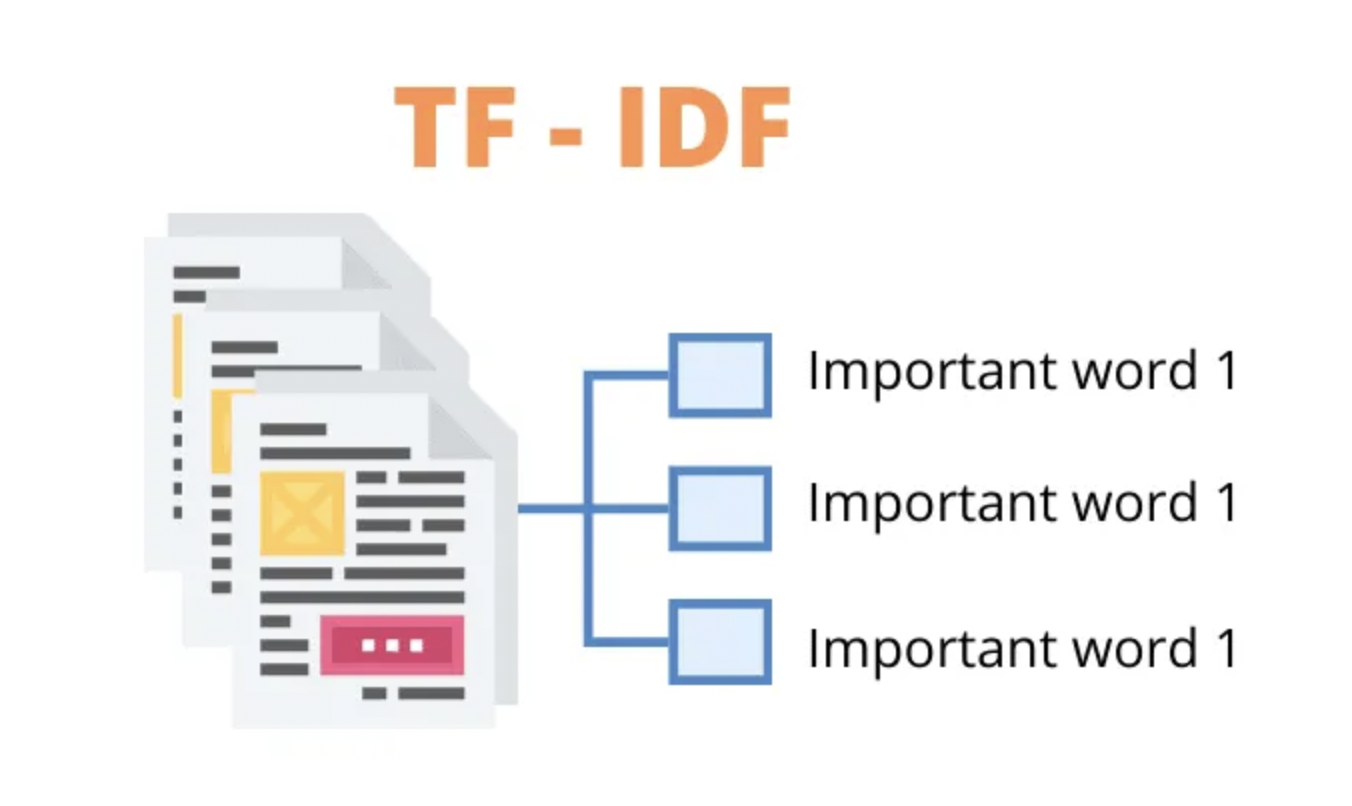

In [16]:
# converting the text data to feature vectors

vectorizer = TfidfVectorizer()

In [17]:
feature_vectors = vectorizer.fit_transform(combined_features)

In [18]:
print(feature_vectors)

  (0, 207)	0.07862358911852857
  (0, 281)	0.09023283807881506
  (0, 5281)	0.11110189871032786
  (0, 13608)	0.10365929555963477
  (0, 5444)	0.10365929555963477
  (0, 3685)	0.2139156076077235
  (0, 3071)	0.2220758111401203
  (0, 5843)	0.16467965954169428
  (0, 14387)	0.3396344162602318
  (0, 16596)	0.12550744845505796
  (0, 3231)	0.2495876537375364
  (0, 14280)	0.2139156076077235
  (0, 4952)	0.24024658931920428
  (0, 15270)	0.07098336929004181
  (0, 17007)	0.12822516360642183
  (0, 11200)	0.09051396620449953
  (0, 11511)	0.272094209011609
  (0, 13358)	0.15022036822291407
  (0, 17016)	0.23642216288179604
  (0, 17299)	0.20197554881263344
  (0, 13328)	0.21774003404513173
  (0, 14073)	0.20595645794173303
  (0, 16677)	0.19842983735418926
  (0, 14617)	0.15151416868595388
  (0, 8764)	0.22708109846346386
  :	:
  (4807, 410)	0.17732764087392294
  (4807, 4842)	0.2471929040013495
  (4807, 17275)	0.28866712901660546
  (4807, 13844)	0.27875711197730835
  (4807, 13184)	0.28866712901660546
  (4807, 171

# Computing Similarity Scores:

Using cosine similarity to compute similarity scores between each pair of movies based on their feature vectors.


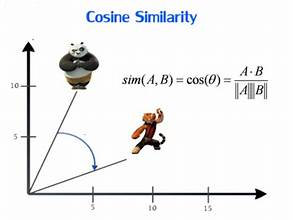

## What happens: 
This is a method used to measure how similar two things are.

## Explanation:
Easy Explanation: Imagine you and your friend are each holding a stick. The closer you hold your sticks together, the more similar they are. If they point in the same direction, they are very similar. If they point in opposite directions, they are very different. Cosine similarity is a way of measuring how "close" the directions are.

## Very Simple Example: 
Suppose you both like action and comedy movies. If you like them equally, your "sticks" (preferences) will be very close, and the cosine similarity will be high.

In [19]:
# getting the similarity scores using cosine similarity

similarity = cosine_similarity(feature_vectors)

# <span style="color:red;">Calculating Cosine Similarity</span>  
## 🔍 We calculate the **cosine similarity** between the movies' feature vectors to find movies that are similar to the one input by the user.


<span style="color:red">**Explanation:** This creates a table that shows how similar each movie is to every other movie. Imagine a chart where you compare each toy to see which ones are most alike.</span>


In [20]:
print(similarity)

[[1.         0.0722257  0.03774545 ... 0.         0.         0.        ]
 [0.0722257  1.         0.03282986 ... 0.03576038 0.         0.        ]
 [0.03774545 0.03282986 1.         ... 0.         0.05370221 0.        ]
 ...
 [0.         0.03576038 0.         ... 1.         0.         0.02651822]
 [0.         0.         0.05370221 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.02651822 0.         1.        ]]


In [21]:
print(similarity.shape)

(4809, 4809)


# <span style="color:red;">User Input</span>  
## 📝 Let's prompt the user to input their favorite movie, for which the system will generate recommendations.


In [22]:
# getting the movie name from the user

movie_name = str(input(' Enter your favourite movie name : '))

 Enter your favourite movie name : Avatar


In [23]:
# creating a list with all the movie names given in the dataset

list_of_all_titles = movies_data['title'].tolist()
print(list_of_all_titles)

['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre', 'The Dark Knight Rises', 'John Carter', 'Spider-Man 3', 'Tangled', 'Avengers: Age of Ultron', 'Harry Potter and the Half-Blood Prince', 'Batman v Superman: Dawn of Justice', 'Superman Returns', 'Quantum of Solace', "Pirates of the Caribbean: Dead Man's Chest", 'The Lone Ranger', 'Man of Steel', 'The Chronicles of Narnia: Prince Caspian', 'The Avengers', 'Pirates of the Caribbean: On Stranger Tides', 'Men in Black 3', 'The Hobbit: The Battle of the Five Armies', 'The Amazing Spider-Man', 'Robin Hood', 'The Hobbit: The Desolation of Smaug', 'The Golden Compass', 'King Kong', 'Titanic', 'Captain America: Civil War', 'Battleship', 'Jurassic World', " 'department': 'Sound'", 'Skyfall', 'Spider-Man 2', 'Iron Man 3', 'Alice in Wonderland', 'X-Men: The Last Stand', 'Monsters University', 'Transformers: Revenge of the Fallen', 'Transformers: Age of Extinction', 'Oz: The Great and Powerful', 'The Amazing Spider-Man 2', 'TRON: Lega

# <span style="color:red;">Finding Close Matches</span>  
## 🔍 Using `difflib.get_close_matches`, we find the closest match to the user's input within the movie titles in our dataset.


<span style="color:red">**Explanation:**</span>

<span style="color:red">1. This code snippet searches for movie titles that closely match the movie name provided by the user.</span>  
<span style="color:red">2. It uses `difflib.get_close_matches` to compare the user's input with the list of all movie titles.</span>  
<span style="color:red">3. The matching titles are then printed to show the user the closest results.</span>


In [24]:
import difflib

# Convert float to string if necessary
movie_name = str(movie_name)

# Convert list of floats to list of strings if necessary
list_of_all_titles = [str(title) for title in list_of_all_titles]

find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)
print(find_close_match)


['Avatar']


In [25]:
close_match = find_close_match[0]
print(close_match)

Avatar


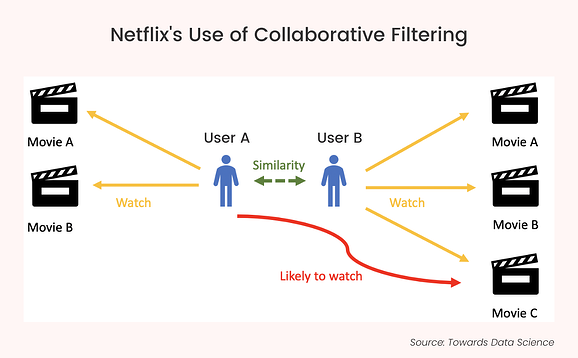

# <span style="color:red;">Indexing and Retrieving Similar Movies</span>  
## 🎯 Once we find the closest match, we retrieve the index of that movie and get the list of similar movies based on their cosine similarity scores.


In [26]:
# finding the index of the movie with title

index_of_the_movie = movies_data[movies_data.title == close_match]['index'].values[0]
print(index_of_the_movie)

0


In [27]:
# getting a list of similar movies

#similarity_score = list(enumerate(similarity[index_of_the_movie]))
#print(similarity_score)

In [28]:
print("index_of_the_movie:", index_of_the_movie)
print("similarity length:", len(similarity))
print(type(index_of_the_movie))
print(type(similarity))
index_of_the_movie= int(index_of_the_movie)
#similarity= int(similarity)
print(type(index_of_the_movie))
print(type(similarity))
# Ensure index_of_the_movie is within the valid range
if isinstance(index_of_the_movie, int) and isinstance(len(similarity), int):
    if 0 <= index_of_the_movie < len(similarity):
        similarity_score = list(enumerate(similarity[index_of_the_movie]))
        print(similarity_score)
    else:
        print("index_of_the_movie is out of range")
else:
    print("index_of_the_movie or similarity length is not an integer")


index_of_the_movie: 0
similarity length: 4809
<class 'str'>
<class 'numpy.ndarray'>
<class 'int'>
<class 'numpy.ndarray'>
[(0, 1.0000000000000002), (1, 0.0722257009379785), (2, 0.037745446233688265), (3, 0.012528226606587815), (4, 0.10704539586718016), (5, 0.07789468126401129), (6, 0.008241240346192136), (7, 0.036149286419391746), (8, 0.02962314447071627), (9, 0.02629834879229645), (10, 0.09264332684224809), (11, 0.012724704557200803), (12, 0.02722901379703447), (13, 0.029583783026168098), (14, 0.06918414658317626), (15, 0.019558943344413767), (16, 0.03427770404141214), (17, 0.02604782692786635), (18, 0.0571626549638509), (19, 0.038969338628904664), (20, 0.039733667131251094), (21, 0.012021303362627666), (22, 0.030451873914270254), (23, 0.04594366519431013), (24, 0.046256109512792284), (25, 0.042854500172393985), (26, 0.07012885048475721), (27, 0.03721571146841066), (28, 0.04316605494264109), (29, 0.0), (30, 0.03859920340581342), (31, 0.07896154033447798), (32, 0.06058023769018175), (3

In [29]:
len(similarity_score)

4809

# <span style="color:red;">Sorting and Displaying Recommendations</span>  
## 🏆 We sort the similar movies by their similarity scores and display the top 30 recommendations to the user, ranked from most to least similar.


In [30]:
# sorting the movies based on their similarity score

sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True)
print(sorted_similar_movies)


[(0, 1.0000000000000002), (3164, 0.24948106328843833), (2409, 0.24843920597061794), (95, 0.24508070900748047), (57, 0.2037986922217023), (48, 0.20116922339011134), (1058, 0.19704237280643175), (843, 0.18010689824979903), (3736, 0.17647085741599977), (4599, 0.1745009136923763), (242, 0.17443318901797267), (1537, 0.16828295852245967), (2702, 0.16505455585422413), (817, 0.1606180464776712), (648, 0.15646580794359158), (4407, 0.15471611571422916), (2204, 0.15219477564205125), (775, 0.1502733265485331), (1957, 0.14934812764035832), (2235, 0.14662466137714175), (1928, 0.1448233042287676), (207, 0.14227064252818847), (3214, 0.14015727124764701), (1765, 0.13900477551743903), (44, 0.1348404653450748), (1479, 0.13477978641463412), (281, 0.1329280028603567), (159, 0.13255437957711147), (1656, 0.1302623243052528), (1281, 0.12603680984828278), (3445, 0.1248291056374331), (666, 0.12154853373110894), (3208, 0.12145396999145419), (4338, 0.12004216700803355), (3111, 0.11948258262119638), (780, 0.118492

<span style="color:red">**Explanation:**</span>

<span style="color:red">1. The code starts by printing the heading 'Movies suggested for you'.</span>  
<span style="color:red">2. The variable `i` is initialized to 1 to keep count of the recommendations.</span>  
<span style="color:red">3. The `for` loop goes through each movie in `sorted_similar_movies`.</span>  
<span style="color:red">4. It finds the movie's title using its index from `movies_data`.</span>  
<span style="color:red">5. If `i` is less than 30, the movie title is printed along with its position.</span>  
<span style="color:red">6. The variable `i` is incremented by 1 each time a movie title is printed.</span>


In [31]:
# print the name of similar movies based on the index

print('Movies suggested for you : \n')

i = 1

for movie in sorted_similar_movies:
    index = movie[0]
    title_from_index = movies_data[movies_data.index==index]['title'].values[0]
    if (i<30):
        print(i, '.',title_from_index)
        i+=1

Movies suggested for you : 

1 . Avatar
2 . Alien
3 . Aliens
4 . Guardians of the Galaxy
5 . Star Trek Beyond
6 . Star Trek Into Darkness
7 . Galaxy Quest
8 . Alien³
9 . Cargo
10 . Trekkies
11 . Gravity
12 . Moonraker
13 . Jason X
14 . Pocahontas
15 . Space Cowboys
16 . The Helix... Loaded
17 . Lockout
18 . Event Horizon
19 . Space Dogs
20 . Machete Kills
21 . Gettysburg
22 . Clash of the Titans
23 . Star Wars: Clone Wars: Volume 1
24 . The Right Stuff
25 . Terminator Salvation
26 . The Astronaut's Wife
27 . Planet of the Apes
28 . Star Trek
29 . Wing Commander


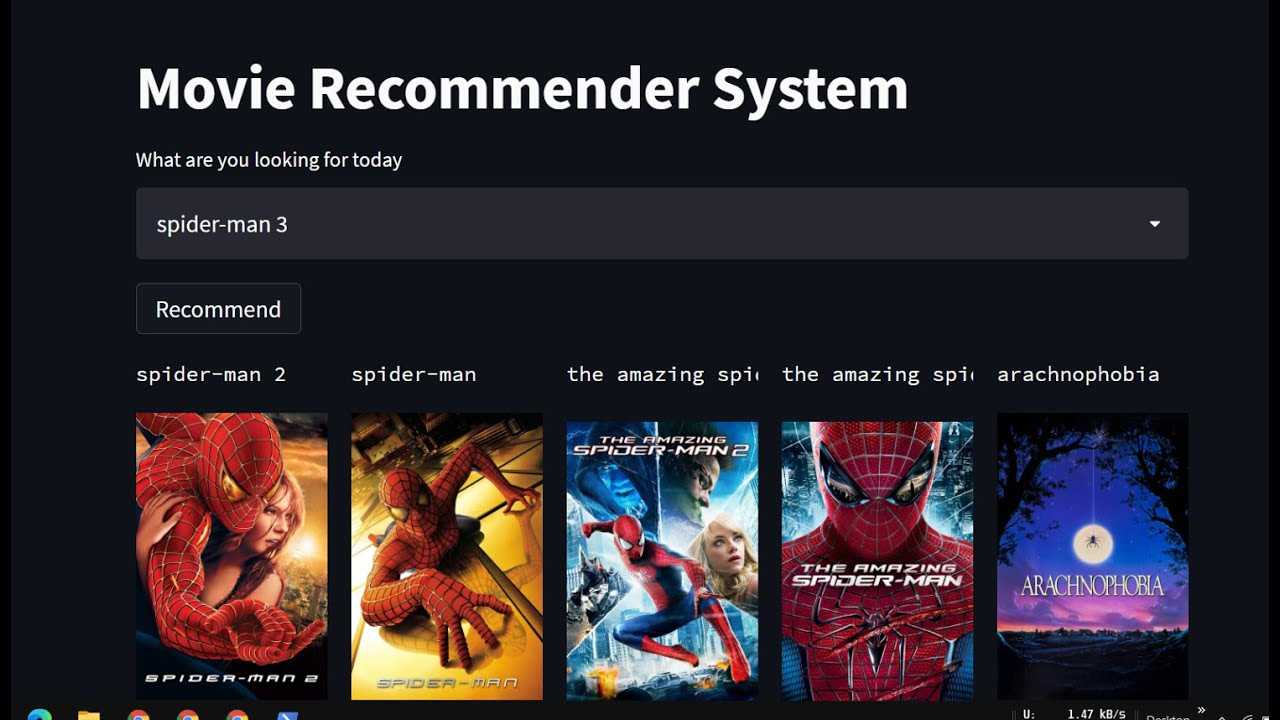

# <span style="color:purple;">Task</span>

**Question:** How I can create UI like above image for Movie Recommendation System

**Answer:** Explore Streamlit to create a user interface for a movie recommendation system.

**Why streamlit?:**

You do not need to write huge code, just describe the components you would use and how they would fit together to create the final application.

**Task Description:**

<span style="color:red;">**Research Streamlit:**</span>
- Look into Streamlit, a Python library designed for building interactive web applications with minimal code.

<span style="color:red;">**Design the UI:**</span>
- Create a text input field where users can type in a movie title.
- Include a button that triggers the recommendation process when clicked.
- Display a list of similar movies based on the input, including their titles and posters.

<span style="color:red;">**Think About Integration:**</span>
- Consider how you would integrate your existing movie data into this Streamlit application.
- Think about how the app will handle user input and display results.

<span style="color:red;">**Resources:**</span>
- **[Streamlit Cheat Sheet](https://docs.streamlit.io/library/cheatsheet)**: A handy reference for common Streamlit commands and functions.
- **[Introduction to Streamlit (Video)](https://youtu.be/RjiqbTLW9_E)**: Watch this video to get a quick overview of Streamlit and see it in action.

